In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df_train=pd.read_excel('training-data-sets.xlsx')
df_train.head()
df_test=pd.read_excel('test dataset v1.xlsx')
df_test.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,...,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,2019283.0,5493.0,37148.2,2045.282,0.000012,0.000012,1.203045e+09,2220633.0,...,27.702433,21.300,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,4564738.0,12938.0,50886.8,2370.584,0.000014,0.000015,1.944356e+09,469895.0,...,21.432628,12.334,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,1029384.0,6546.0,253333.2,3180.888,0.000016,0.000017,9.984054e+08,4465061.0,...,29.726275,23.213,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,902938.0,3928.0,3426239.0,13595.398,0.000016,0.000019,3.039816e+09,1031855.0,...,30.326275,14.456,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,1343454.0,28374.0,552197.8,3983.134,0.000016,0.000019,9.622004e+08,2842722.0,...,31.702433,25.300,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 39 columns):
Day                                   12000 non-null int64
EQ                                    12000 non-null float64
Social_Search_Impressions             12000 non-null int64
Social_Search_Working_cost            12000 non-null int64
Digital_Impressions                   12000 non-null int64
Digital_Working_cost                  12000 non-null int64
Print_Impressions.Ads40               12000 non-null int64
Print_Working_Cost.Ads50              12000 non-null int64
OOH_Impressions                       12000 non-null int64
OOH_Working_Cost                      12000 non-null int64
SOS_pct                               12000 non-null int64
Digital_Impressions_pct               12000 non-null int64
CCFOT                                 12000 non-null int64
Median_Temp                           12000 non-null int64
Median_Rainfall                       12000 non-null float64
Fu

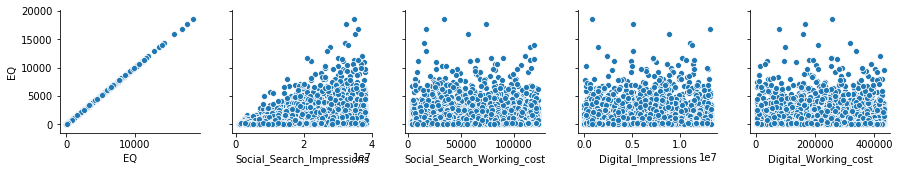

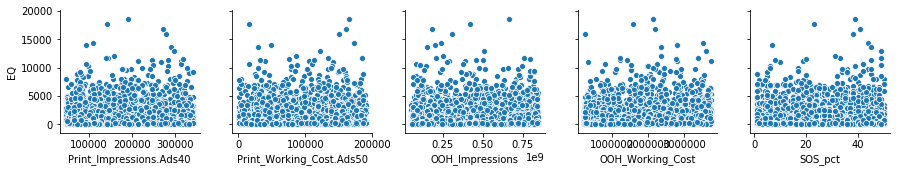

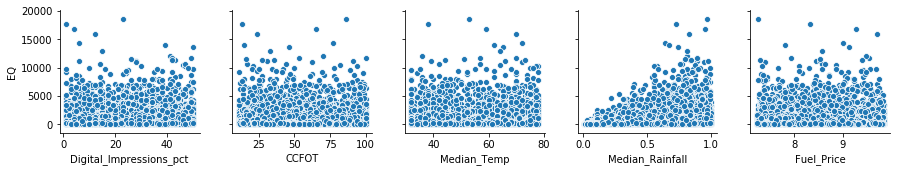

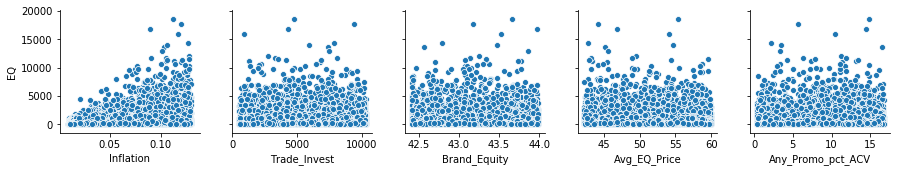

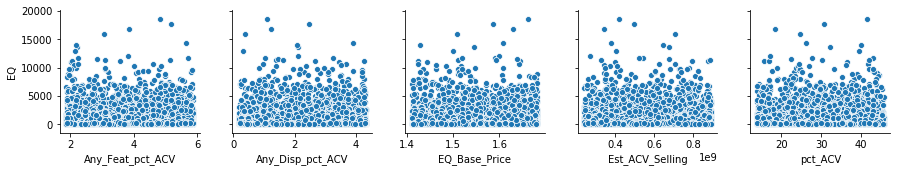

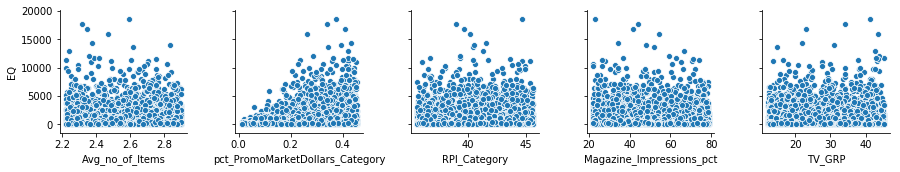

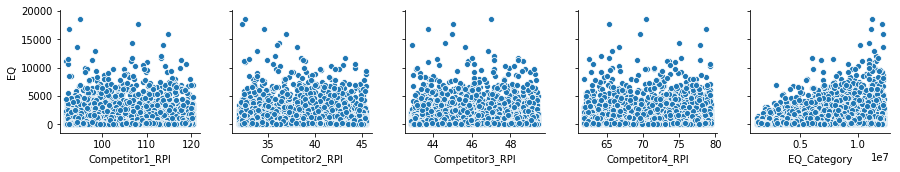

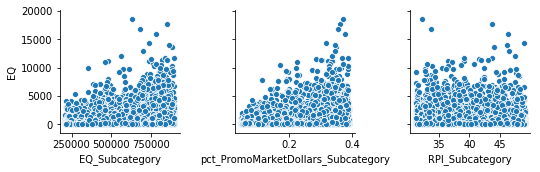

In [8]:
for i in range(1, len(df_train.columns),5):
    sns.pairplot(data=df_train,
                x_vars=df_train.columns[i:i+5],
                y_vars=['EQ'])

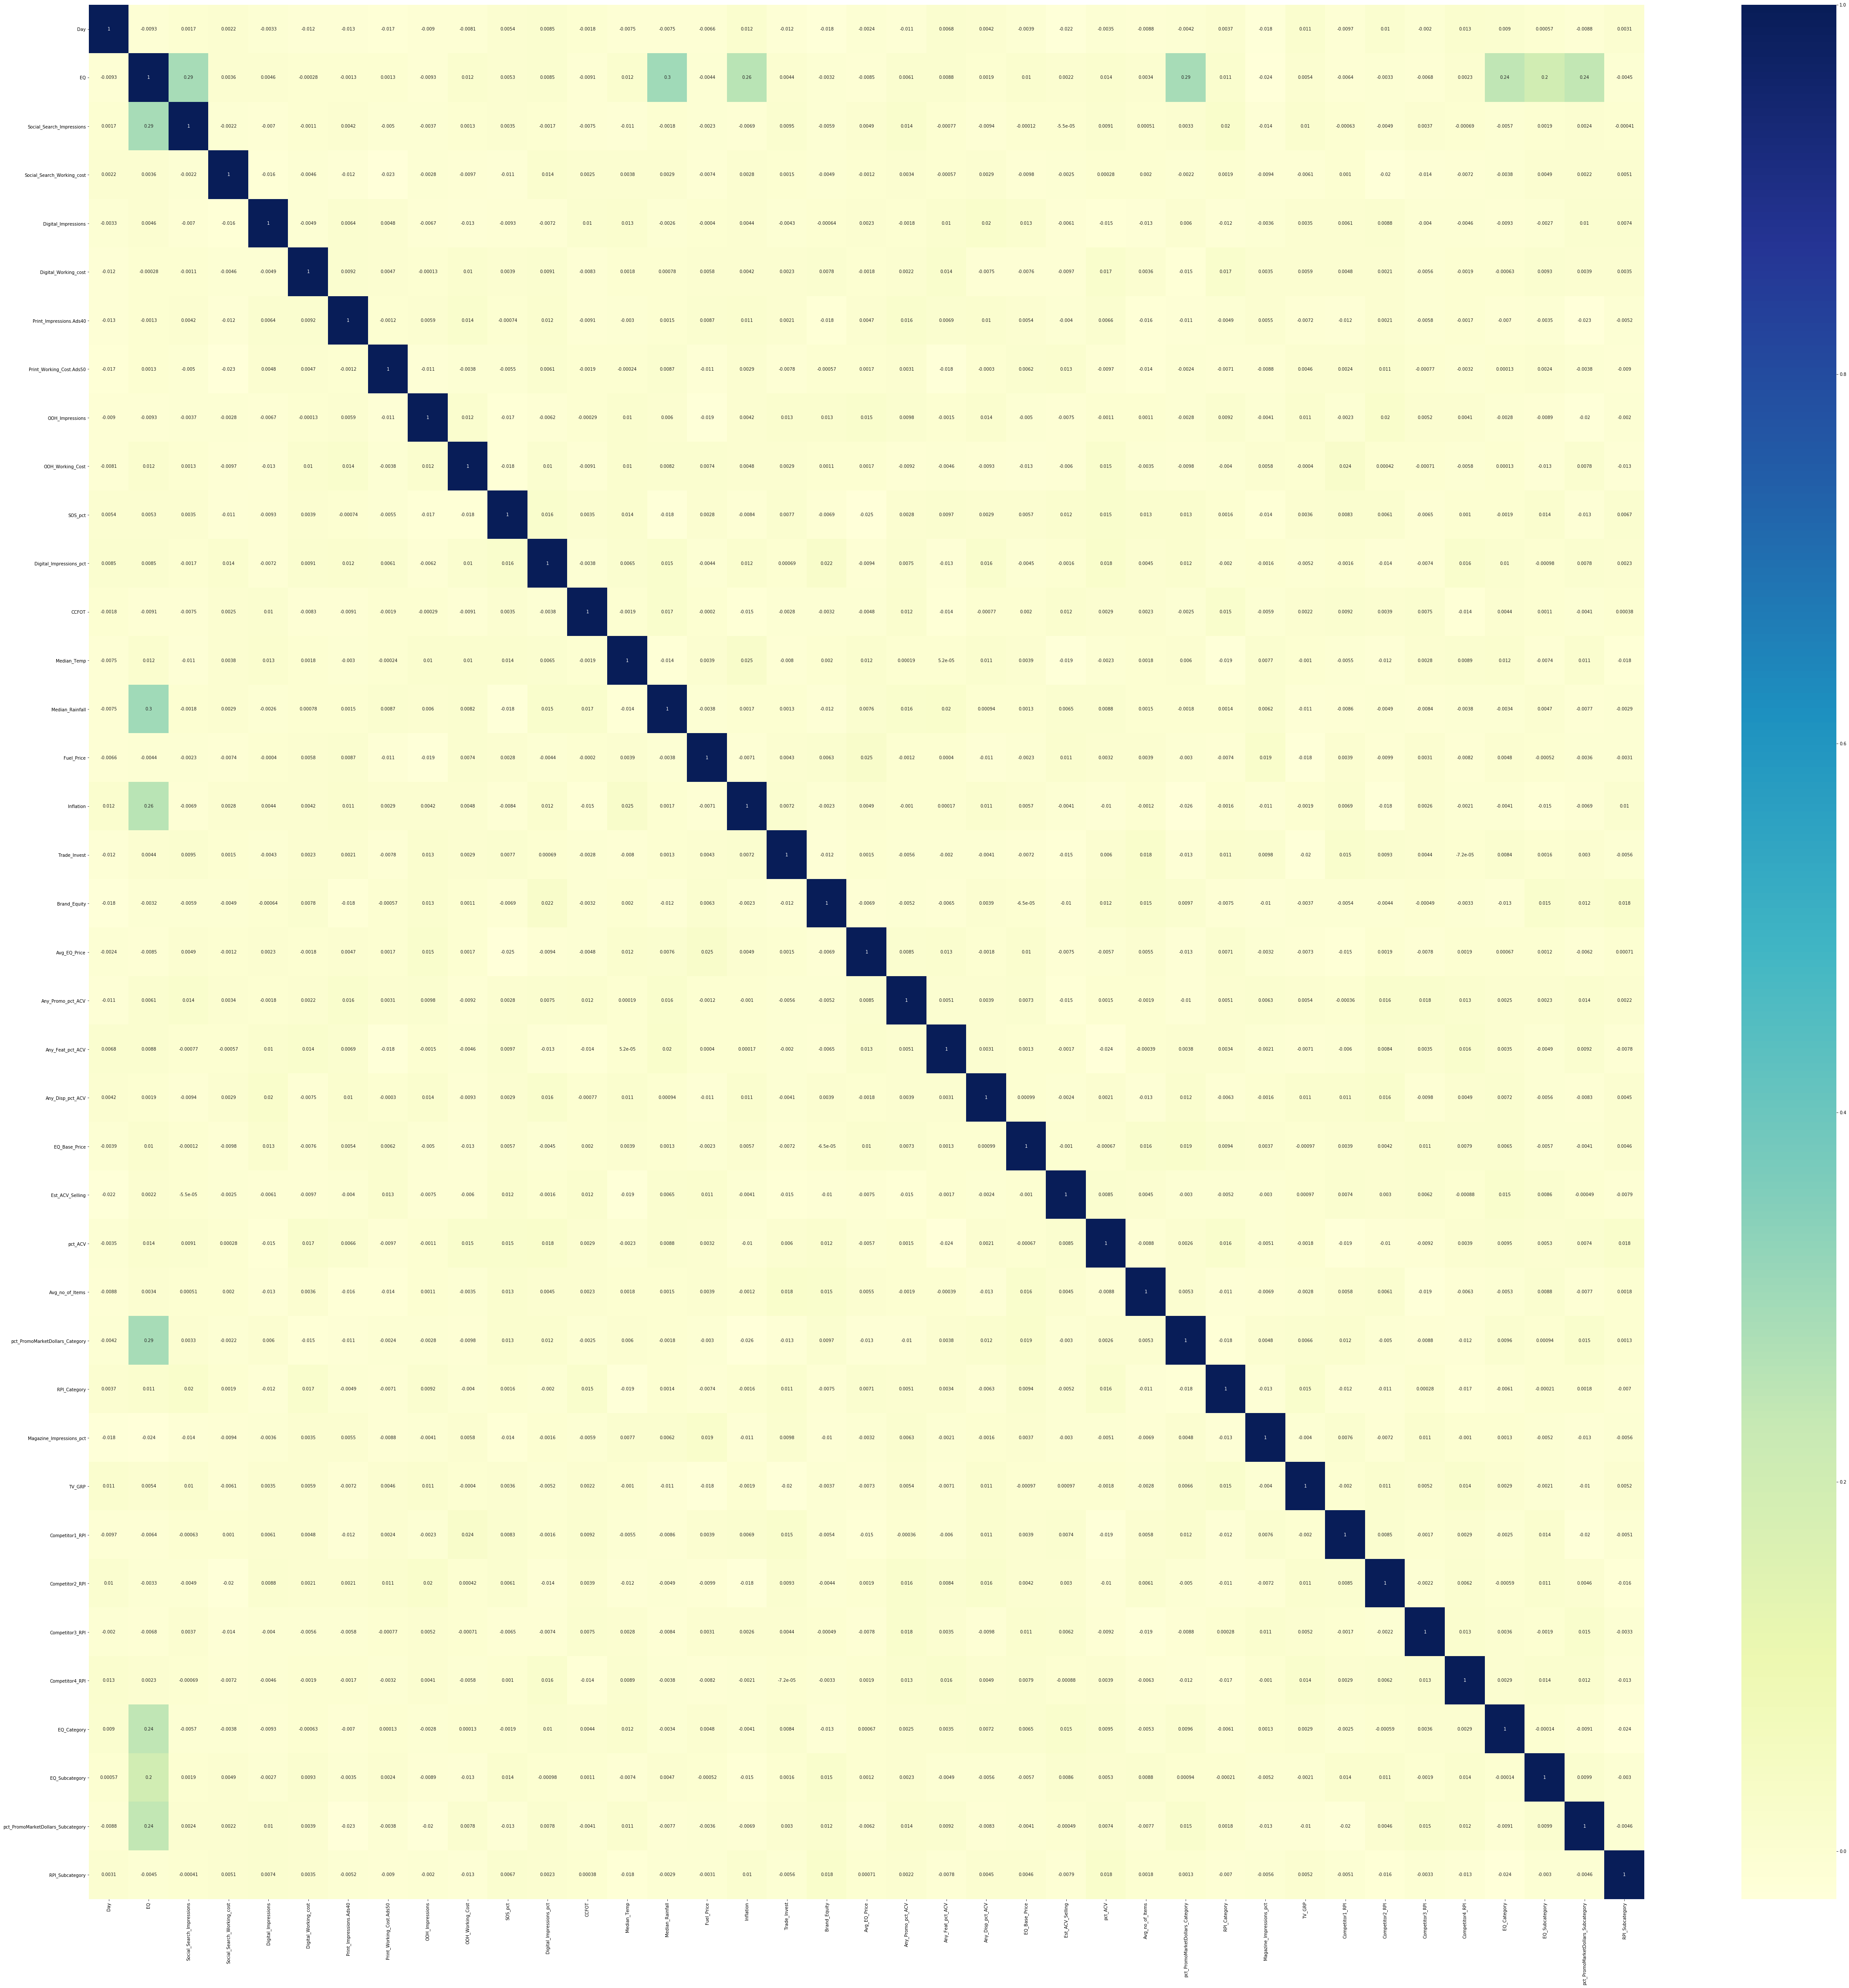

In [13]:
plt.figure(figsize = (80, 80))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [15]:
sales_corr = df_train.corr()['EQ'][:-1] # -1 because the latest row is SalePrice
golden_features_list = sales_corr[abs(sales_corr) > 0.2].sort_values(ascending=False)
print("There is {} strongly correlated values with sales:\n{}".format(len(golden_features_list), golden_features_list))

There is 7 strongly correlated values with price:
EQ                                    1.000000
Median_Rainfall                       0.302193
Social_Search_Impressions             0.289183
pct_PromoMarketDollars_Category       0.288971
Inflation                             0.255183
EQ_Category                           0.242798
pct_PromoMarketDollars_Subcategory    0.238667
Name: EQ, dtype: float64


In [ ]:
data = pd.concat([df_train,df_test],ignore_index=True)
data = data.drop("SalePrice", 1)
ids = test["Id"]